           --------- *Use Case analysis by Martina Martinovic* ----------------
# Classification problem on marketing campaigns in bank

The dataset that we will be working with is from a Portuguese banking institution about its direct marketing campaigns.
This use case solves a classification problem. 

 Goal: to predict, if a client will subscribe a term deposit (denoted in **variable y**) or not.

Contents:

0. Introduction

1. Exploratory Data Analysis

1.1 Install packages and loading data

1.2 Visually inspecting dataset

1.3 Checking data type and empty or "false" cells

1.4 Univariate analysis of qualitative variables which contain "unknown" value

1.5 Univariate analysis of other qualitative variables

1.6 Checkig data distribution of numerical variables

1.6.1 Checkig basic statistic

1.7 Bivariate analysis


## 0. Introduction

Inside **Bank_Dataset** folder is your datasets, there are two files:
- `short` contains only a 10% of observations, is a subset of the full file.
- `full` contains all observations
The variables explanation below is taken directly from the dataset source. 

### Bank client data:
- `age` (numeric)
- `job` type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- `marital` marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- `default` has credit in default? (categorical: 'no','yes','unknown')
- `housing` has housing loan? (categorical: 'no','yes','unknown')
- `loan` has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
- `contact` contact communication type (categorical: 'cellular','telephone')
- `month` last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- `day_of_week` last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- `duration` last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- `campaign` number of contacts performed during this campaign and for this client (numeric, includes last contact)

### Other attributes :

- `pdays` number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- `previous` number of contacts performed before this campaign and for this client (numeric)
- `poutcome` outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    
### Social and economic context attributes
- `emp.var.rate` employment variation rate - quarterly indicator (numeric)
- `cons.price.idx` consumer price index - monthly indicator (numeric)
- `cons.conf.idx` consumer confidence index - monthly indicator (numeric)
- `euribor3m` euribor 3 month rate - daily indicator (numeric)
- `nr.employed` number of employees - quarterly indicator (numeric)

Output variable (desired target):
- `y` has the client subscribed a term deposit? (binary: 'yes','no')

## 1. Exploratory Data Analysis

### 1.1 Install packages and loading data

In [30]:
!pip install missingno

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #https://towardsdatascience.com/a-major-seaborn-plotting-tip-i-wish-i-had-learned-earlier-d8209ad0a20e
import pandas as pd

In [5]:
df = pd.read_csv(r"C:\Users\mmartinovic\06-DataScienceMasterclass\bank-additional-full\bank-additional-full.csv", sep=";")

### 1.2 Visually inspecting dataset

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


This first view gives some interesting information - for example, pdays is 999, previous is 0

### 1.3 Checking data type and empty or "false" cells

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It appears that there is no "null" values. Let's check for wrong entries like symbols -,?,#,*,etc.

In [9]:
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

age : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
duration : [ 261  149  226 ... 1246 1556 1868]
campaign : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

### 1.4 Univariate analysis of qualitative variables which contain "unknown" value

We can notice that there are several qualitative variables which have 'unknown' in value: job, marital, education, default, housing, loan.
Let's analyse what is the total number of this value comparred to other values within the same variable.

C:\Users\mmartinovic\AppData\Local\Temp\ipykernel_15064\856551607.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mmartinovic\AppData\Local\Temp\ipykernel_15064\856551607.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


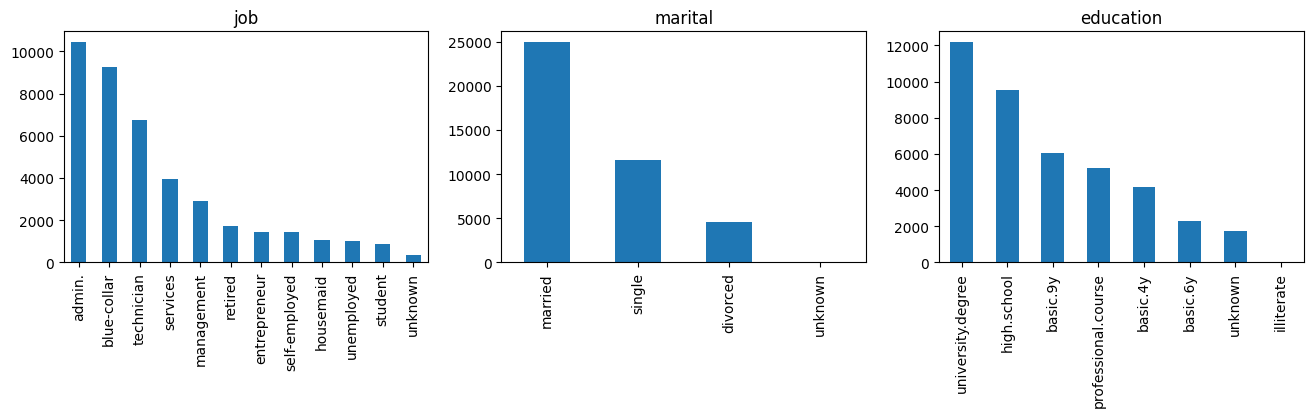

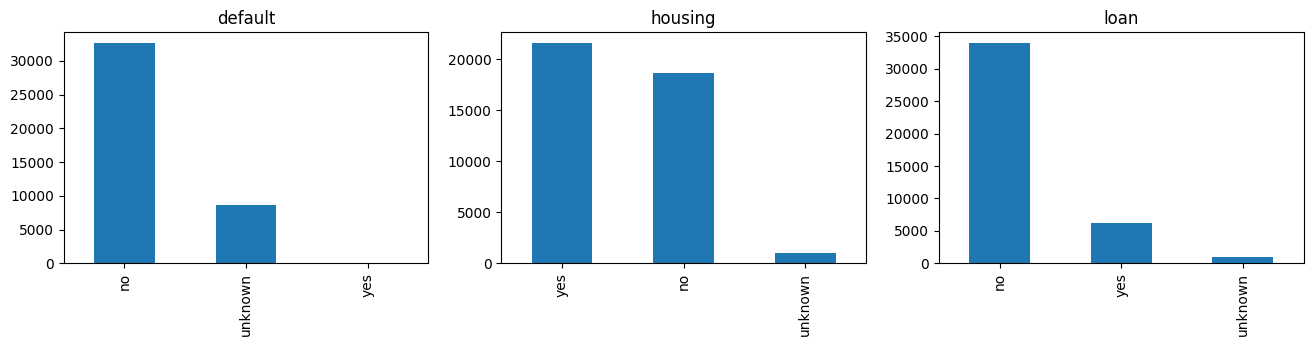

In [10]:
categorical_features = ['job', 'marital', 'education']
fig, ax = plt.subplots(1,len(categorical_features),figsize = (16,3))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(ax=ax[i], kind="bar").set_title(categorical_feature)
    
fig.show()

categorical_features = ['default', 'housing', 'loan']
fig, ax = plt.subplots(1,len(categorical_features),figsize = (16,3))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(ax=ax[i], kind="bar").set_title(categorical_feature)
    
fig.show()

In all features except "default", value "unknown" is not significant. So let's take a better look at the default feature.

In [11]:
check_default = df.groupby(['default']).agg({'default':[ 'count']})
check_default

,default
,count
default,
no,32588
unknown,8597
yes,3


Only 3 clients were defaulted, and nearly 30% unknown status. I suppose this will be mostly "no", because if the default status is common, then more attention would be on the reason why clients go to default, change risk taking, change collaterals in loan approval or similar actions, and in the database this would be important to know actual status. Also, I would say, since this is analysis for offering term deposit, this feature is not needed.

Later we will check what is the connection of this feature to other features.

### 1.5 Univariate analysis of other qualitative variables

C:\Users\mmartinovic\AppData\Local\Temp\ipykernel_15064\3678920025.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


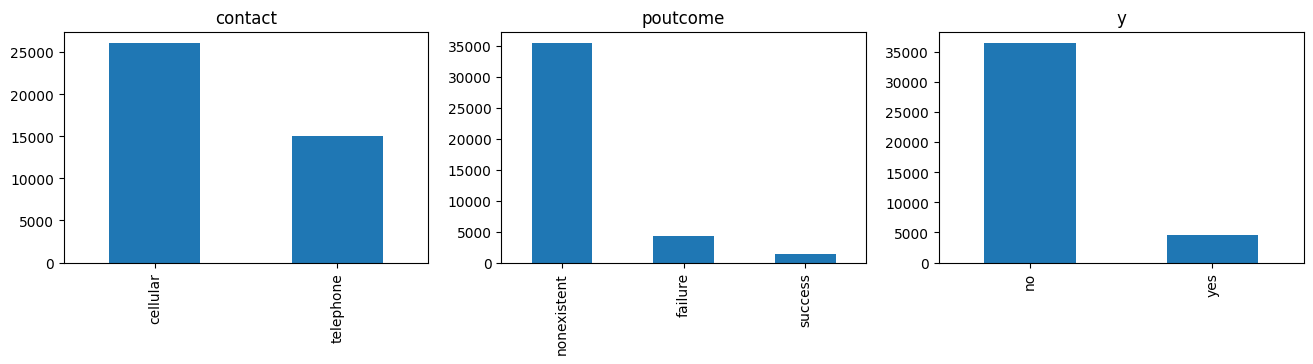

In [12]:
categorical_features = ['contact', 'poutcome', 'y']
fig, ax = plt.subplots(1,len(categorical_features),figsize = (16,3))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(ax=ax[i], kind="bar").set_title(categorical_feature)
    
fig.show()

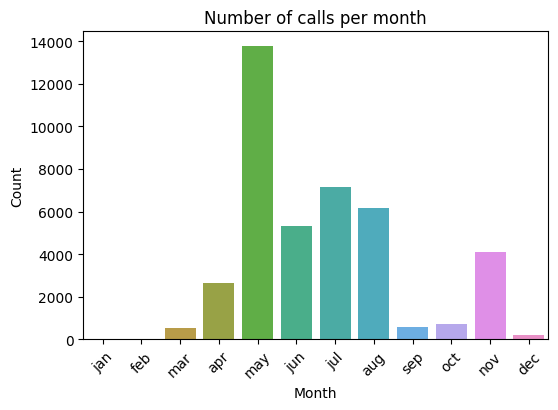

In [13]:
# Unique categories
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
# Creating CategoricalDtype
order_cat = pd.api.types.CategoricalDtype(categories = month_order, ordered = True)
# Change data type of month variable as order_cat data type
df.month = df.month.astype(order_cat)
plt.figure(figsize = (6,4))
ax = sns.countplot(data = df, 
                   x = 'month')
ax.set(title = 'Number of calls per month', 
       xlabel = 'Month',
       ylabel = 'Count')
plt.xticks(rotation = 45);

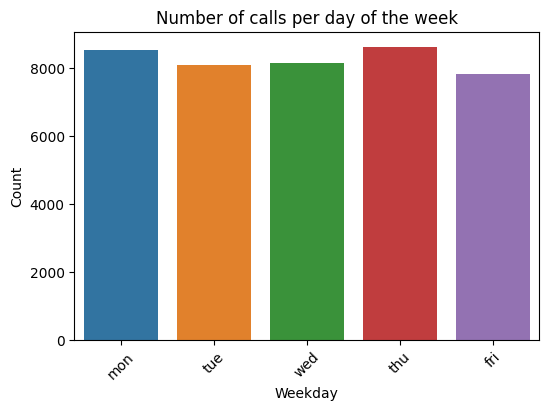

In [14]:
# Unique categories
dayinweek_order = ['mon','tue','wed','thu','fri']
# Creating CategoricalDtype
orderday_cat = pd.api.types.CategoricalDtype(categories = dayinweek_order, ordered = True)
# Change data type of month variable as order_cat data type
df.day_of_week = df.day_of_week.astype(orderday_cat)
plt.figure(figsize = (6,4))
ax = sns.countplot(data = df, 
                   x = 'day_of_week')
ax.set(title = 'Number of calls per day of the week', 
       xlabel = 'Weekday',
       ylabel = 'Count')
plt.xticks(rotation = 45);

### 1.6 Checkig data distribution of numerical variables
#### 1.6.1 Checkig basic statistic

In [15]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- age: we see here average age of our clients is 40 years old, youngest person is 17 years old, and oldest one is 98 years old. It is unclear if the age data is current data, or is it at the day of conducting campaigns..
- duration: according to variable description, this feature will be deleted. 
- campaign: On average, every client participated in 2,5 campaign, out of total 56 campaigns. This is not statistically significant number of campaigns.
- pdays: Pdays feature is interesting. Most clients have never been contacted since the first quantile is also 999. This will be interesting to check in more detail..
- previous: this feature has average of 0,17 which means that 0,17 clients hav been contacted. Compared to pdays being mostly 999, this makes sense, but it would be usefull to check this variable together with pdays to gain more insights into stats for the clients which were contacted.

#### 1.6.2 Univariate analysis

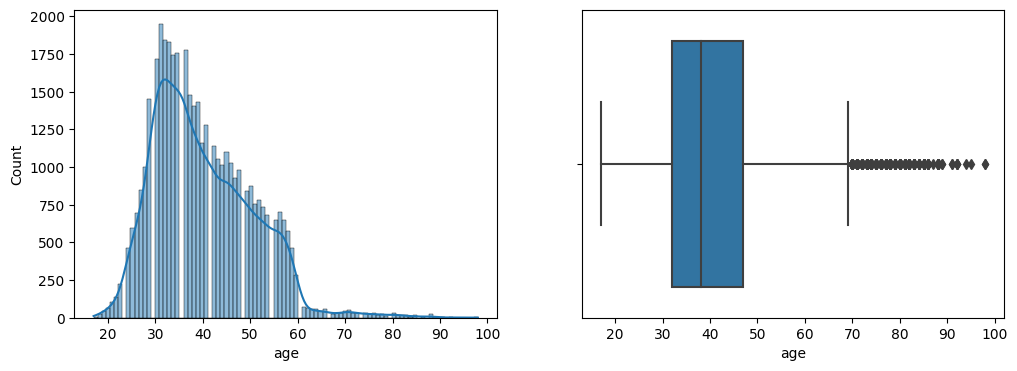

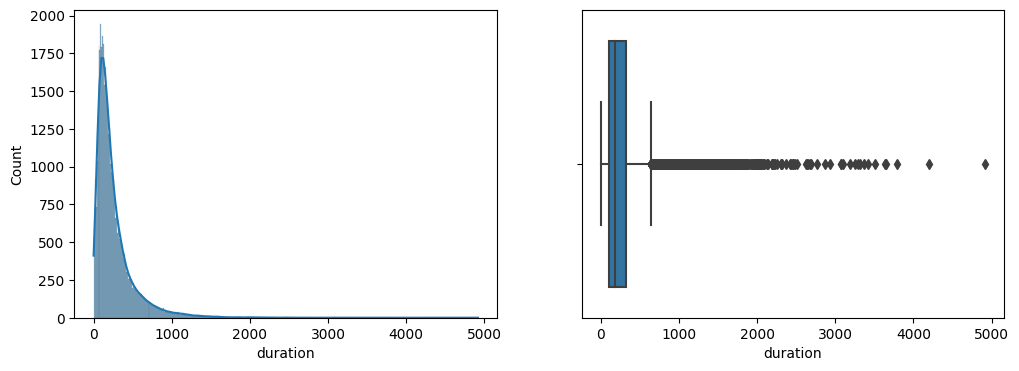

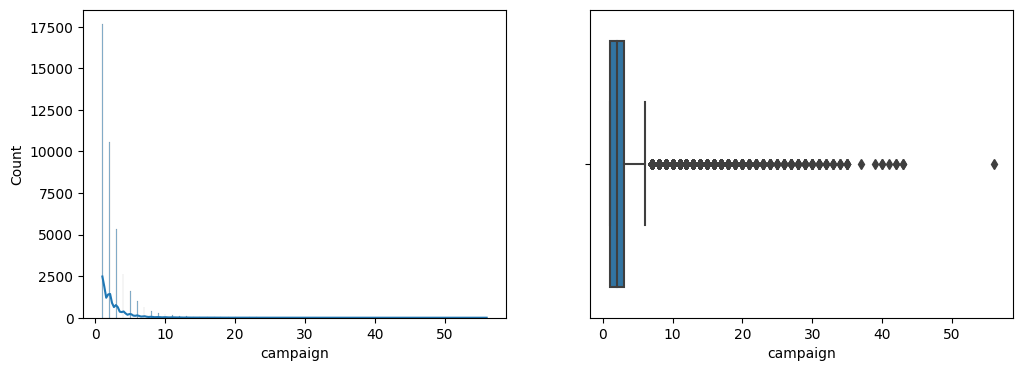

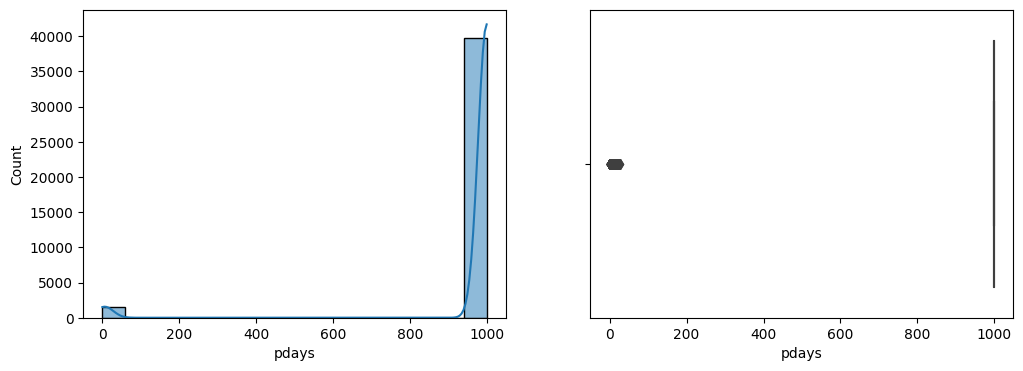

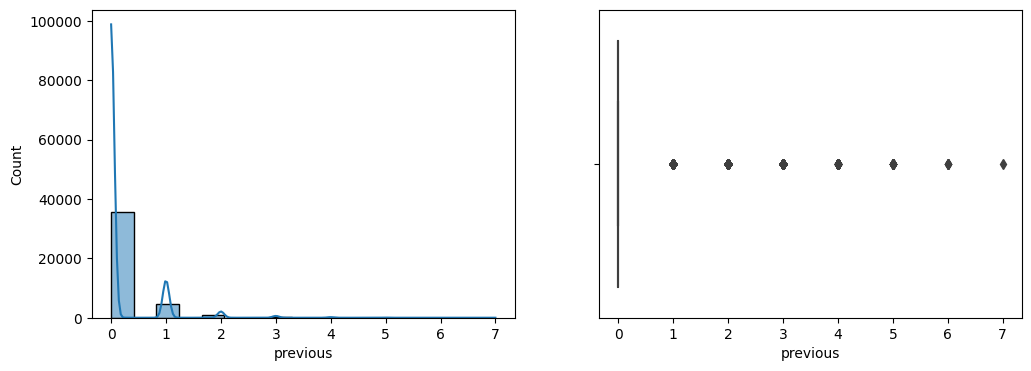

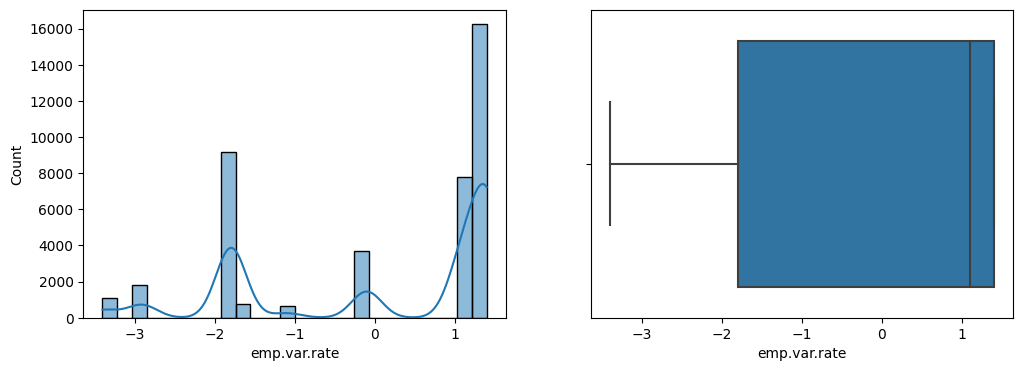

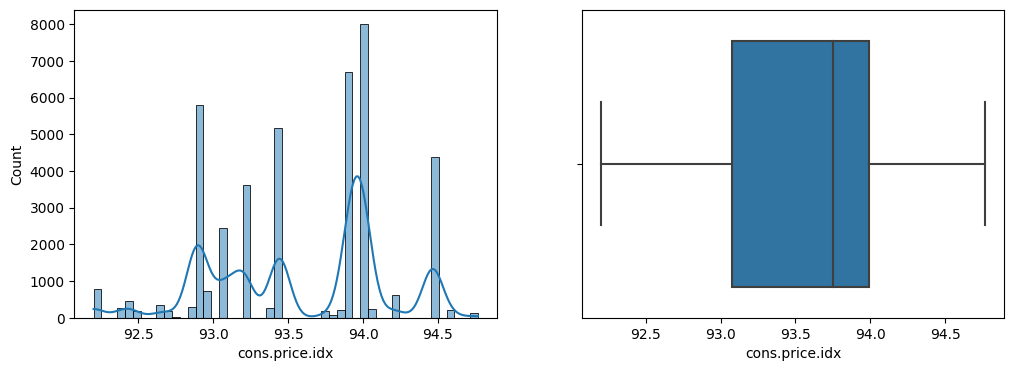

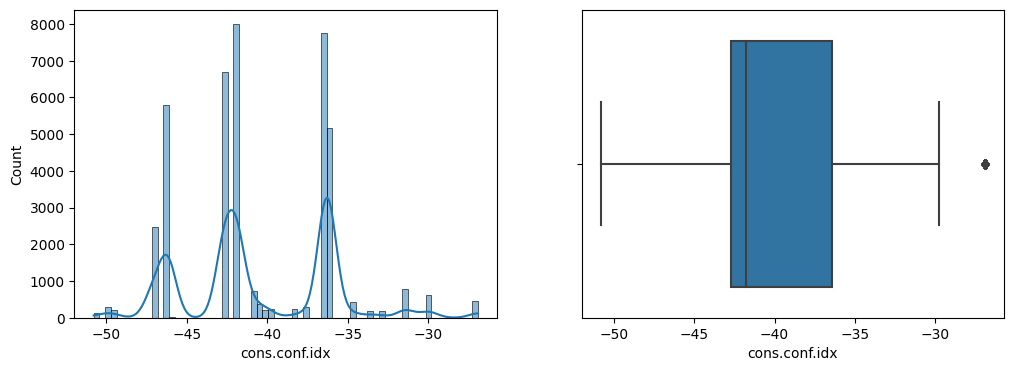

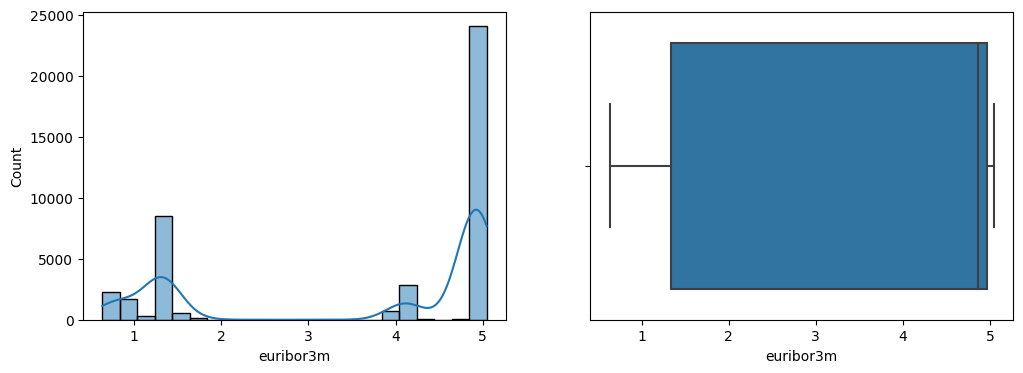

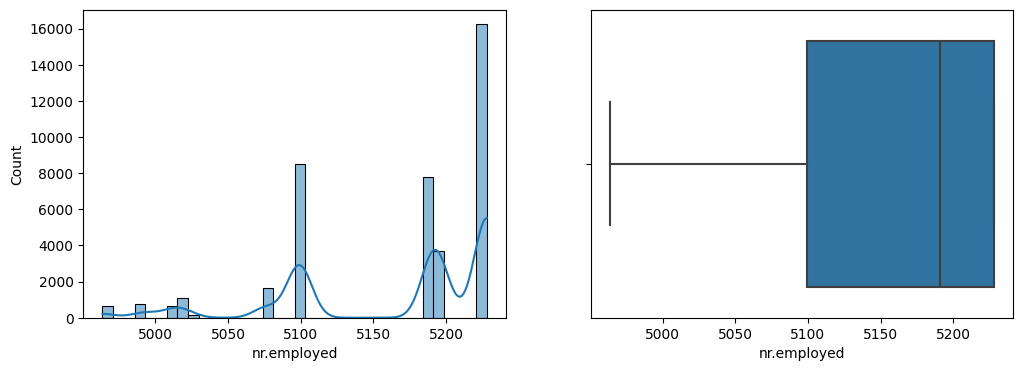

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df)
    plt.show()

Let's look into more detail in pdays variable.

In [19]:
filter_999 = df['pdays'] == 999
data_999 = df.loc[filter_999]
data_999

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [22]:
previous_campaign1=data_999.groupby(['pdays','previous','poutcome'])['age'].count()

In [23]:
previous_campaign1

pdays  previous  poutcome   
999    0         nonexistent    35563
       1         failure         3696
       2         failure          349
       3         failure           50
       4         failure           12
       5         failure            2
       6         failure            1
Name: age, dtype: int64

In [24]:
filter_not999 = df['pdays'] != 999
data_not999 = df.loc[filter_not999]
data_not999

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,1,3,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,...,2,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41163,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,tue,...,3,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,...,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes


In [26]:
previous_campaign2 = data_not999.groupby(['pdays','previous','poutcome'])['age'].count()

In [29]:
previous_campaign2

pdays  previous  poutcome
0      1         success     7
       2         success     4
       3         success     2
       4         success     1
       5         success     1
                            ..
21     5         failure     1
22     1         success     3
25     2         failure     1
26     1         success     1
27     1         success     1
Name: age, Length: 113, dtype: int64

It also could be that here is an error .. Let's take a better look at this specific case..

In [58]:
filter_0 = data_not999['pdays'] == 0
data_0 = data_not999.loc[filter_0]
data_0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
25497,31,unemployed,single,professional.course,no,yes,no,cellular,nov,wed,...,1,0,1,success,-0.1,93.200,-42.0,4.120,5195.8,no
25996,35,management,married,university.degree,no,yes,yes,telephone,nov,wed,...,3,0,2,success,-0.1,93.200,-42.0,4.120,5195.8,no
30238,51,technician,married,professional.course,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30314,36,admin.,married,university.degree,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30417,30,admin.,single,university.degree,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30688,35,blue-collar,married,basic.6y,unknown,yes,no,cellular,may,tue,...,1,0,1,success,-1.8,92.893,-46.2,1.344,5099.1,no
40360,48,admin.,married,university.degree,no,yes,yes,cellular,aug,wed,...,1,0,3,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40364,27,student,single,university.degree,no,yes,no,cellular,aug,wed,...,1,0,3,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40365,28,student,single,basic.9y,no,yes,no,cellular,aug,wed,...,1,0,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40376,27,student,single,university.degree,no,yes,no,telephone,aug,wed,...,1,0,5,success,-1.7,94.027,-38.3,0.900,4991.6,no


Maybe pdays = 0 should be positive.. That would mean since pdays=0, there was 0 days since we contacted client in previous campaign, and we actualy contacted him at lease once (previous) and there was a success in previous campaign.
So could this be that pdays=0 means today..?
Maybe 15 clients will not be significant to the model design.

### 1.7 Bivariate analysis

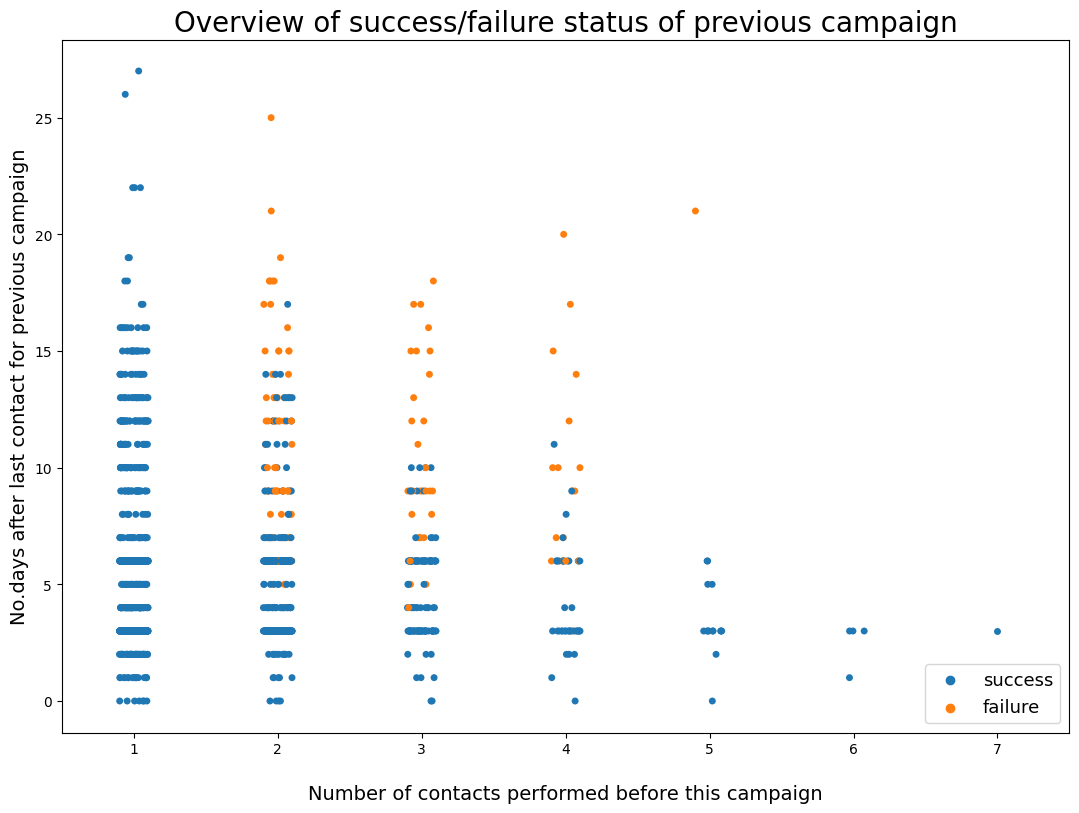

In [63]:
# Stripplots

plt.subplots(figsize = (13,9))
sns.stripplot(data = data_not999, 
              x = 'previous', 
              y = 'pdays', 
              hue ='poutcome')
plt.xlabel('Number of contacts performed before this campaign', fontsize = 14, labelpad = 20)     
plt.ylabel('No.days after last contact for previous campaign', fontsize = 14)
plt.title('Overview of success/failure status of previous campaign', 
          fontsize = 20)
plt.legend(loc = 4, prop = {'size': 13});           # Adjusting the legend's position and the size

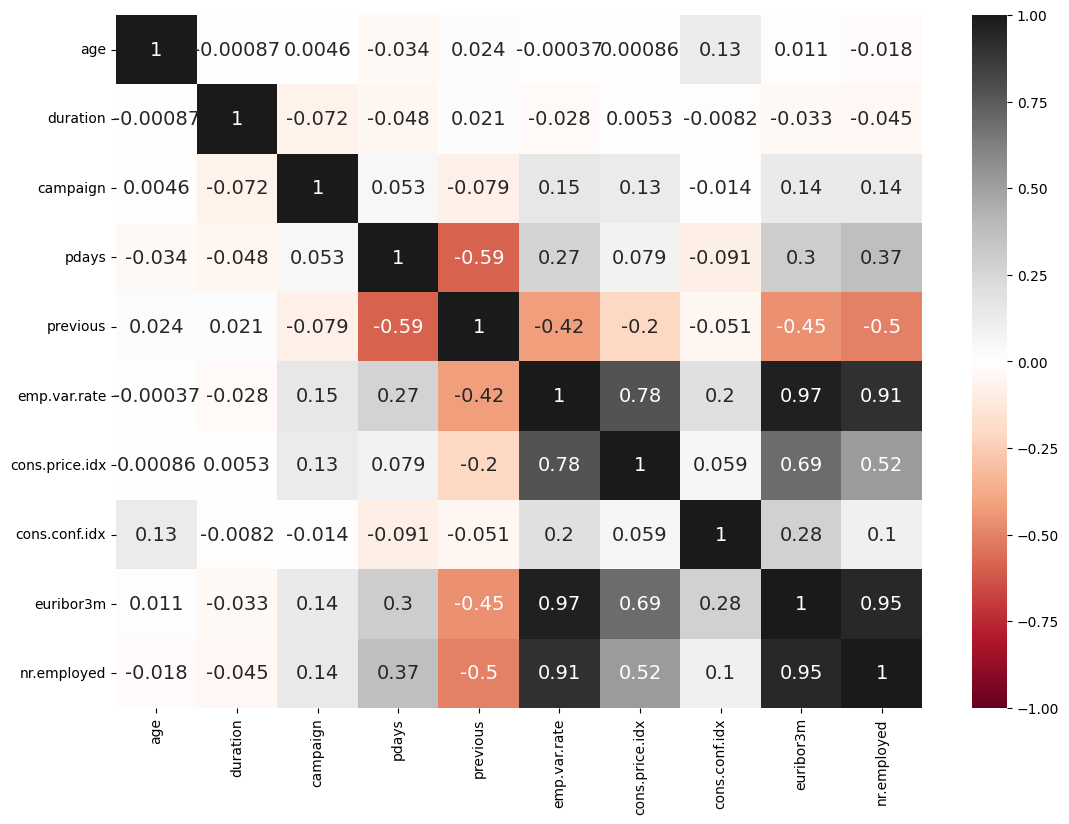

In [53]:
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize = (13,9))
sns.heatmap(corr, 
            annot = True,                 # Correlation coeficients will be displayed in each cell
            annot_kws = {'fontsize':14},  # Setting a fontsize
            cmap = 'RdGy',                # Setting a color map
            vmin = -1, vmax = 1);         # Setting min and max for color map 

Question: 

How do we treat unknown in analysis? Do we try to find substitute for it or we treat it as an actual information?